<a href="https://colab.research.google.com/github/mathu3004/Bank_Marketing_MachineLearning_CW/blob/main/Bank_Marketing_CM2604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mathusha Kannathasan

RGU ID: 2410212

IIT ID: 20233136

In [1]:
# Import the google.colab module to access the 'drive' object
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Data**

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/2410212_CM2604/bank-additional-full.csv'
data = pd.read_csv(file_path, delimiter=';')

# Display first few rows
df = pd.DataFrame(data)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **Exploratory Data Analysis (EDA)**

In [24]:
# Basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

In [25]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.5788

In [26]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [27]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(data.duplicated().sum())


Duplicate Rows:
12


In [28]:
# Value counts for the target variable
print("\nTarget Variable Distribution:")
print(data['y'].value_counts())


Target Variable Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64


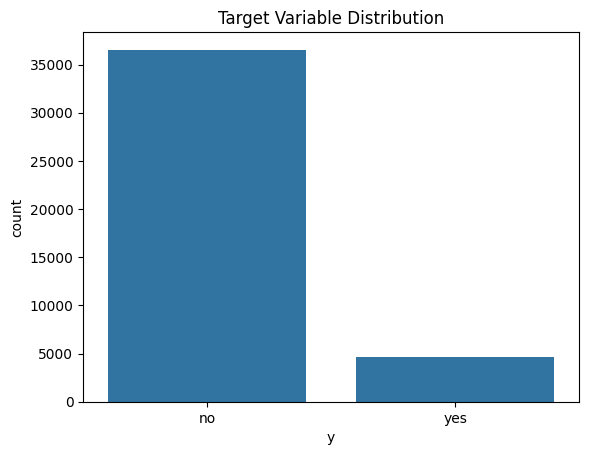

In [29]:
# Visualize target variable distribution
sns.countplot(x=data['y'])
plt.title("Target Variable Distribution")
plt.show()

In [30]:
# Checking unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")

print("Unique values in 'y' column before processing:", data['y'].unique())


Unique Values in Categorical Columns:
job: 12 unique values
marital: 4 unique values
education: 8 unique values
default: 3 unique values
housing: 3 unique values
loan: 3 unique values
contact: 2 unique values
month: 10 unique values
day_of_week: 5 unique values
poutcome: 3 unique values
y: 2 unique values
Unique values in 'y' column before processing: ['no' 'yes']


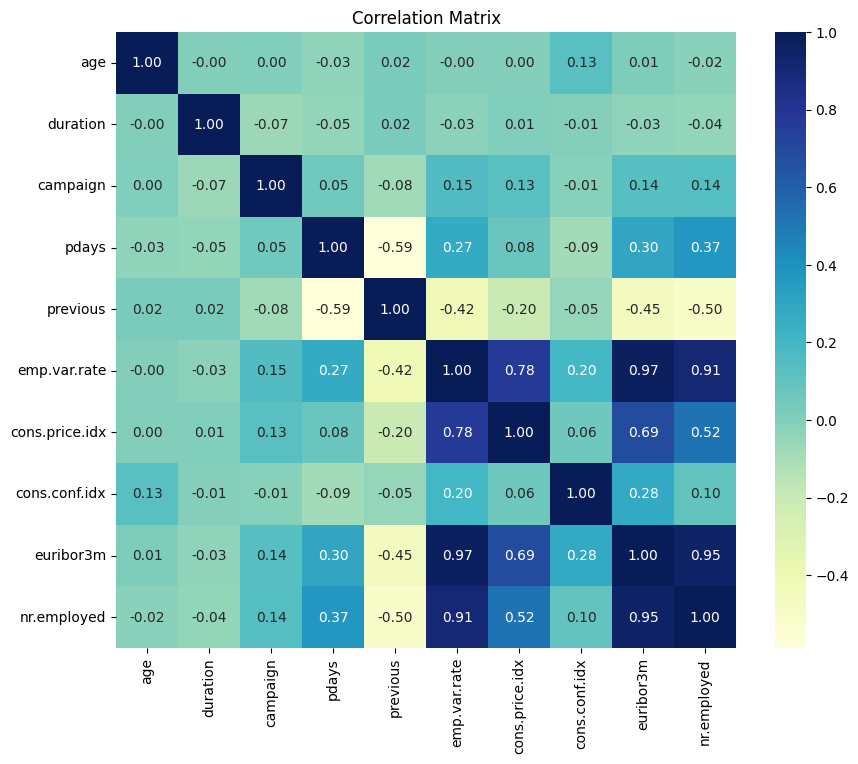

In [31]:
# Visualize correlation (for numerical columns)
# numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

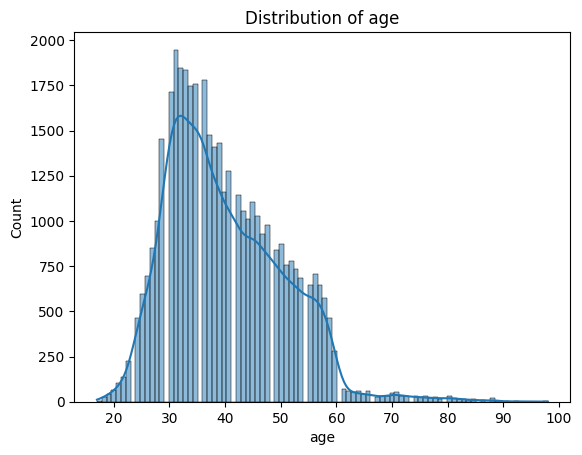

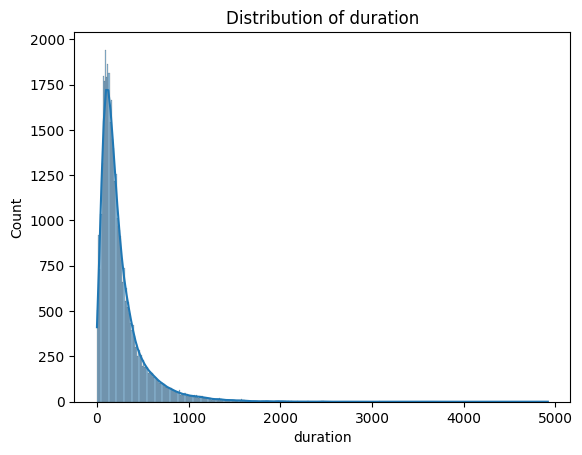

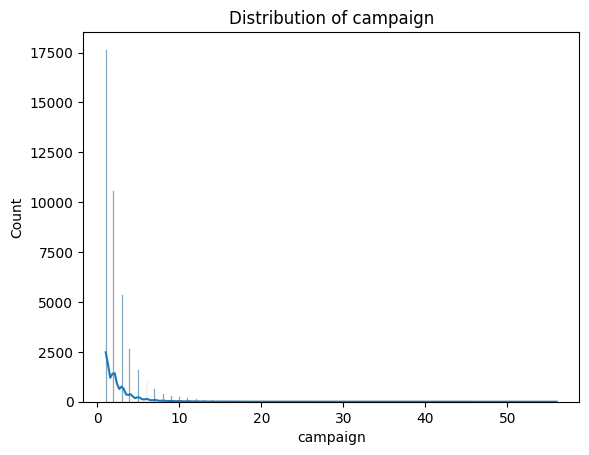

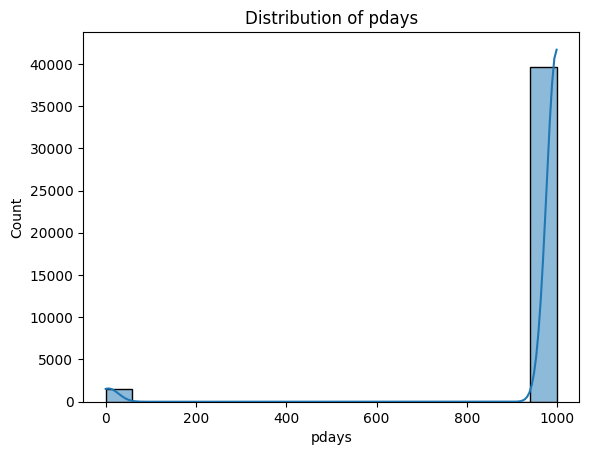

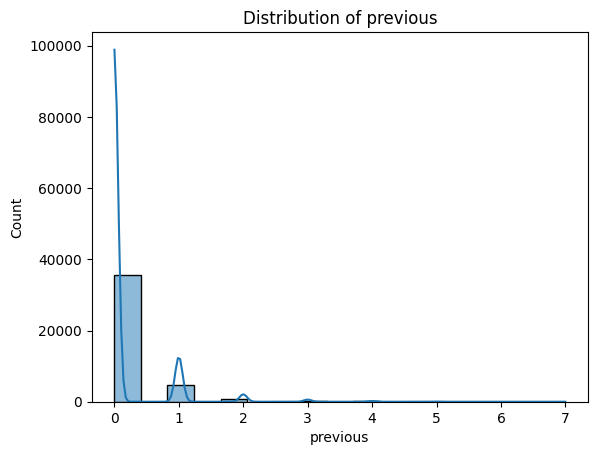

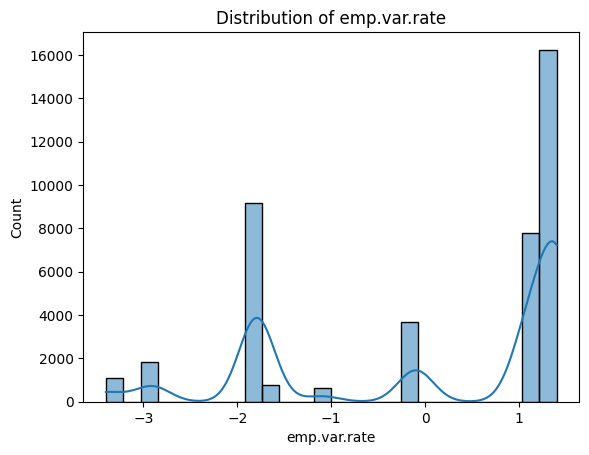

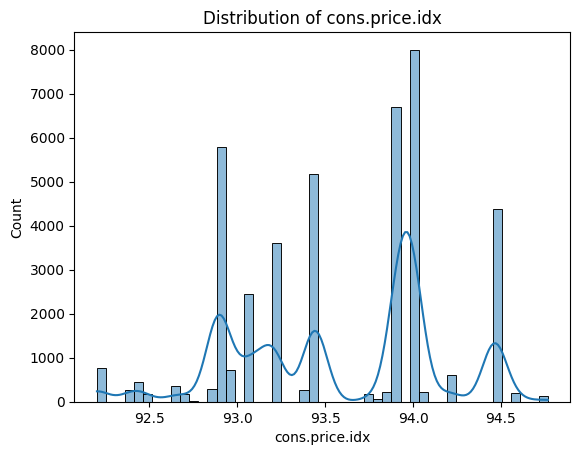

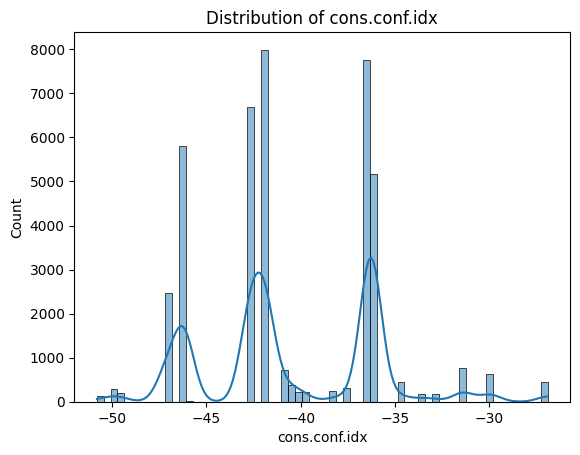

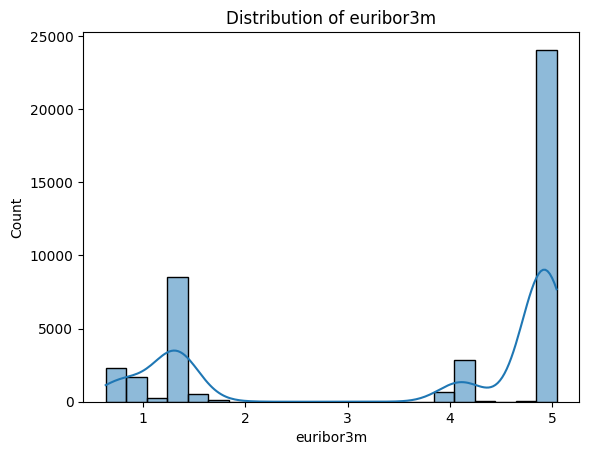

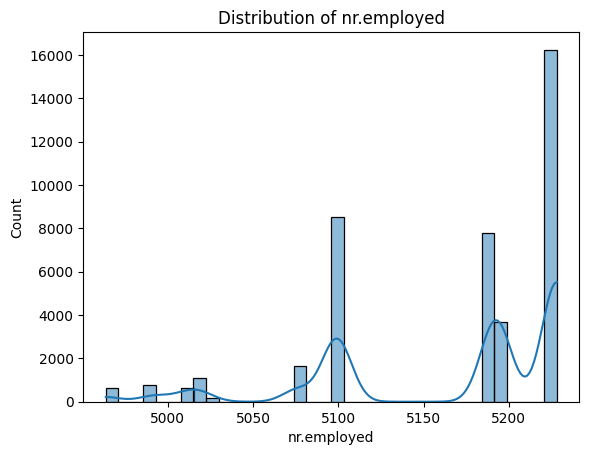

In [32]:
# Plot distributions of numerical features
for col in numerical_data.columns:
    plt.figure()
    sns.histplot(numerical_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()